#VIDEO 1

##Introduction

This is what we're here for. The world we live in thrives on information that yearns to be analyzed. Big tech has effectively used statistical and machine learning algorithms to glean critical, just in-time actionable insights from complex data. We've built up a mutifaceted understanding of our data and are ready to transition from observing patterns and relationships to utilizing these relationships to estimate and predict outcomes for new data.


 **Pandas**, **NumPy**, **Plotly** and **Scikit Learn** 

##Learning Outcomes

Upon completion of this module, you will be able to 

**LO1: Translate Higher Education Challenges into Machine Learning Tasks.**

**LO2: Prepare Machine Learning-Ready Data Using Pandas for Effective Feature Engineering.**

**LO3:  Develop, Optimize, and Evaluate the Logistic Regression Model for Classifying Qualitative Variables in Education Using Scikit Learn.**

**LO4: Deploy Trained Machine Learning Models to Facilitate High-Stakes Decision-Making in Higher Education.**

##Understand

###Higher Education Challenge: Modeling Retention/Dropout for Enrollment Management

Shontelle has been an experienced administrator in higher education for over a decade, but nothing could have prepared her for the massive changes that resulted from covid-19 pandemic. As part of her job duties, she had overseen eight straight years of continued growth in enrollment of first year students to her university. All of a sudden, enrollment was dropping fast. Not only because of less applicants, but also students who started  out at the university were dropping out more often. As a first generation student herself, Shontelle is passionate about what a college degree can do for a family and their community. As an administrator, she is also aware that FTES impact the university's bottom line. While she understands that outreach and recruitment are critical processes that can help stop the bleeding, she directs her efforts toward retention - making sure matriculated students persist and have a viable path to graduation. In a three pronged approach, she 

 - works with faculty in the Education department to conduct focus groups with first year students to hear about the chalenges they face that may make persistence to year 2 difficult. 
 - conducts a thorough literature review to learn from others what best practices have emerged to promote persistence.
 - requests data from her Institutional Research team with the goal of supplementing the qualitative findings with quantitative insights. Her recent enrollment in the Machine Learning in Higher Education Certificate provides a perfect opportunity for her to analyze the data.
 
These three streams of information will inform the policy recommendations she makes to the university president.



#VIDEO 2

##Preparing the Data

Let's use Python to determine how Shontelle can use institutional data to create predictive tools that will help inform her policy choices. Her Higher Ed model building challenge can be distilled into the following research statement:

**For the population of students with high school data available in our database, and whose initial course enrollment at our instiution was as matriculated first time - first year students, how can we build a statistical/machine learning model that uses student data available at the end of semester 2 to predict student departure in semester 3?**

**Population: The most recent cohort of students with high school data recorded, and semester 3 university data available**

**Question:  How can we build a statistical model that utilizes student data available at the end of semester 2 to predict departure in semester 3?**


This problem statement can be generalized to a wider population or tailored to a different sub population (such as transfer or international students).


###Data Ingestion

In Module 2: *Magic Pandas Library: Mastering Higher Education Data Preparation and Analysis*, we learned how to merge data that originated from multiple sources accross campus. The High School, Enrollment, Admissions, Course and Completion datasets all provide valuable information to assist us in our effort to predict students metrics in future semesters. As you recall, we've selected a subset of the variables from these data to include in the modeling phase. These include:
1. Academic Performance Data

      - Available at time of admission: high school GPAs

      - Available at time of modeling: units attempted, completed, DFW, postsecondary GPAs available at time of modeling 
2. Demographic Data
      - Gender, ethnicity, first gen status 

3. The target variable, **SEM_3_STATUS**, a qualitative variable coded as follows:

| Code | Meaning | 
|---|---|
|C |Continuing |
|NR |Not Reached |
|GD |Gap taken or Dropped |


Let's load the necessary Python libraries to import the data and start to process it for analysis:

In [0]:
#Libraries for importing and preparing data
import pandas as pd
import numpy as np

We'll be executing quite a few commands that insert randomnes into the process, which will result in different answers every time we (and you) run this code. We can ensure reproducibility by setting a global seed for this notebook:

In [0]:
rms = 34

In [0]:
rng = np.random.RandomState(rms)

Now let's import the **final_out_retention** data we've been working with. Then, by typing the name we assign it, we can scope out the top and bottom 5 rows of the DataFrame and view its basic attributes in detail:

In [0]:
#Let's ensure that we can view all columns of the dataframe, along with a head and tail look at the data
pd.set_option('display.max_columns',None)

retention = pd.read_csv('/dbfs/FileStore/ml-file-store/bronze/final_out_retention.csv')

retention

,SID,ENROLLMENT_YEAR,ENROLLMENT_TERM,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_GPA,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,FIRST_SEM_W,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,DFW_UNITS_1,GPA_1,CUM_GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,DFW_UNITS_2,GPA_2,CUM_GPA_2,UNITS_ATTEMPTED_3,UNITS_COMPLETED_3,DFW_UNITS_3,GPA_3,CUM_GPA_3,UNITS_ATTEMPTED_4,UNITS_COMPLETED_4,DFW_UNITS_4,GPA_4,CUM_GPA_4,SEM_3_STATUS,SEM_4_STATUS
0,000GPJ93V,2020,Fall,20204,White,Male,Continuing Generation,NaN,NaN,NaN,Engineering,0,8.0,8.0,0.0,3.125000,3.125000,10.0,7.0,3.0,1.900000,2.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GD,GD
1,000M7YLAX,2015,Fall,20154,White,Female,Continuing Generation,NaN,NaN,NaN,Business,0,12.0,9.0,3.0,2.250000,2.250000,12.0,12.0,0.0,2.250000,2.250000,15.0,12.0,3.0,2.400000,2.307692,12.0,12.0,0.0,3.500000,2.588235,C,C
2,000NSOJN5,2021,Fall,20214,Hispanic,Female,Unknown,NaN,NaN,NaN,Health,0,9.0,9.0,0.0,3.666667,3.666667,10.0,10.0,0.0,4.000000,3.842105,9.0,9.0,0.0,4.000000,3.892857,10.0,10.0,0.0,4.000000,3.921053,C,C
3,000O3VNKL,2022,Fall,20224,Black or African American,Female,Continuing Generation,3.63,3.48,3.81,Science,0,9.0,9.0,0.0,2.000000,2.000000,12.0,6.0,6.0,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR,NR
4,000VJZY7Q,2011,Fall,20114,Nonresident alien,Male,Continuing Generation,NaN,NaN,NaN,Business,0,16.0,16.0,0.0,2.562500,2.562500,17.0,17.0,0.0,2.764706,2.666667,13.0,13.0,0.0,2.769231,2.695652,17.0,17.0,0.0,3.176471,2.825397,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108477,ZB7E7YA6N,2020,Fall,20204,Hispanic,Male,First Generation,3.07,2.88,3.38,Business,1,0.0,0.0,0.0,0.000000,0.000000,15.0,9.0,6.0,1.800000,1.800000,12.0,12.0,0.0,2.250000,2.000000,6.0,0.0,6.0,0.000000,1.636364,C,C
108478,ZMPYZ9E5I,2010,Fall,20104,White,Female,Continuing Generation,NaN,NaN,NaN,Liberal Arts,1,0.0,0.0,0.0,0.000000,0.000000,15.0,3.0,12.0,1.200000,1.200000,12.0,9.0,3.0,2.750000,1.888889,12.0,12.0,0.0,3.500000,2.384615,C,C
108479,ZQNCEV86E,2014,Spring,20142,Hispanic,Male,First Generation,NaN,NaN,NaN,Health,1,0.0,0.0,0.0,0.000000,0.000000,9.0,9.0,0.0,2.666667,2.666667,9.0,9.0,0.0,3.000000,2.833333,9.0,9.0,0.0,3.666667,3.111111,C,C
108480,ZWH3KOPGP,2020,Fall,20204,Asian,Female,Continuing Generation,NaN,NaN,NaN,Health,1,0.0,0.0,0.0,0.000000,0.000000,6.0,6.0,0.0,3.500000,3.500000,13.0,13.0,0.0,2.846154,3.052632,15.0,15.0,0.0,3.200000,3.117647,C,C


Supervised learning cannot occur if the target is not observed. So let's determine whether any observations of the SEM_3_STATUS variable are missing:

In [0]:
retention['SEM_3_STATUS'].isna().sum()

Out[5]: 0

No missing values, so we may proceed. Let's investigate the distribution of outcomes for our target:

In [0]:
pd.value_counts(retention['SEM_3_STATUS'])

Out[6]: C     94586
NR     7908
GD     5988
Name: SEM_3_STATUS, dtype: int64

Clearly the vast majority of students in our data persist through the third term. This is obviously a desired outcome, but the preponderance of retained students and scarcity of those who leave inherently makes our stated objective challenging. In the face of this challenge our task remains unchanged: use our classification model to reliably predict whether a student is a member of the minority class: those who leave the university for a variety of reasons. 

###Data Wrangling

Data availability is a necessary condition for data analysis, but it is not sufficient. There are a number of modifications we need to make to the data to prepare it for machine learning. The process of preparing the data for exploration and modeling is known as **data wrangling**, and will be performed here. 
To answer Shontelle's question, we need to build a model using cohorts for which term 3 grade data has already been collected. Thus we subset the data to create a dataframe consisting of the most recent cohort for which this is true, Fall 2021:

In [0]:
retention21 = retention[retention['COHORT']==20214]
retention21

,SID,ENROLLMENT_YEAR,ENROLLMENT_TERM,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_GPA,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,FIRST_SEM_W,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,DFW_UNITS_1,GPA_1,CUM_GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,DFW_UNITS_2,GPA_2,CUM_GPA_2,UNITS_ATTEMPTED_3,UNITS_COMPLETED_3,DFW_UNITS_3,GPA_3,CUM_GPA_3,UNITS_ATTEMPTED_4,UNITS_COMPLETED_4,DFW_UNITS_4,GPA_4,CUM_GPA_4,SEM_3_STATUS,SEM_4_STATUS
2,000NSOJN5,2021,Fall,20214,Hispanic,Female,Unknown,NaN,NaN,NaN,Health,0,9.0,9.0,0.0,3.666667,3.666667,10.0,10.0,0.0,4.000000,3.842105,9.0,9.0,0.0,4.000000,3.892857,10.0,10.0,0.0,4.000000,3.921053,C,C
15,006D4XDFZ,2021,Fall,20214,Asian,Female,First Generation,3.66,3.69,3.84,University Programs,0,12.0,12.0,0.0,3.750000,3.750000,12.0,12.0,0.0,3.750000,3.750000,11.0,11.0,0.0,4.000000,3.828571,13.0,13.0,0.0,3.153846,3.645833,C,C
16,008KHPY7J,2021,Fall,20214,Hispanic,Female,Continuing Generation,NaN,NaN,NaN,Liberal Arts,0,12.0,12.0,0.0,3.000000,3.000000,9.0,6.0,3.0,2.000000,2.571429,9.0,6.0,3.0,2.000000,2.400000,9.0,0.0,9.0,0.666667,2.000000,C,C
24,00B7BSZKV,2021,Fall,20214,Hispanic,Female,First Generation,NaN,NaN,NaN,Science,0,13.0,10.0,3.0,2.307692,2.307692,13.0,13.0,0.0,3.461538,2.884615,10.0,10.0,0.0,3.000000,2.916667,13.0,13.0,0.0,3.461538,3.061224,C,C
34,00FJI6JWK,2021,Fall,20214,Hispanic,Female,Continuing Generation,NaN,NaN,NaN,Liberal Arts,0,12.0,12.0,0.0,3.000000,3.000000,17.0,17.0,0.0,3.294118,3.172414,12.0,9.0,3.0,2.750000,3.048780,14.0,14.0,0.0,3.357143,3.127273,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108438,U9HW6MZNG,2021,Fall,20214,White,Female,Continuing Generation,4.16,4.12,4.14,Engineering,1,0.0,0.0,0.0,0.000000,0.000000,15.0,15.0,0.0,3.600000,3.600000,15.0,15.0,0.0,3.200000,3.400000,3.0,3.0,0.0,3.000000,3.363636,C,C
108440,UDDOGFL75,2021,Fall,20214,Asian,Female,Continuing Generation,NaN,NaN,NaN,Liberal Arts,1,0.0,0.0,0.0,0.000000,0.000000,12.0,12.0,0.0,4.000000,4.000000,9.0,9.0,0.0,3.333333,3.714286,15.0,15.0,0.0,3.800000,3.750000,C,C
108446,VNU2TKAMS,2021,Fall,20214,Asian,Female,Continuing Generation,NaN,NaN,NaN,Arts,1,0.0,0.0,0.0,0.000000,0.000000,9.0,3.0,6.0,0.666667,0.666667,9.0,0.0,9.0,0.000000,0.333333,9.0,0.0,9.0,0.000000,0.222222,C,C
108459,XAT5B0ZJF,2021,Fall,20214,Hispanic,Female,Continuing Generation,3.16,2.98,3.04,Liberal Arts,1,0.0,0.0,0.0,0.000000,0.000000,12.0,12.0,0.0,2.500000,2.500000,12.0,12.0,0.0,3.750000,3.125000,9.0,9.0,0.0,3.666667,3.272727,C,C


This is will be our primary dataframe for this analysis. It consists of 7,945 observations, uniquely identified by SID (as well as their row index from the original **fry** data frame), and 33 variables. Note that selecting this cohort removes all NR values from our target: 

In [0]:
pd.value_counts(retention21['SEM_3_STATUS'])

Out[8]: C     7271
GD     674
Name: SEM_3_STATUS, dtype: int64

**EXERCISE: Why were all of the *NR* values removed from the SEM_3_STATUS variable when we selected the Fall 2021 cohort?**

The removal of the *NR* values is a good thing, but there are clearly some challenges we'll need to overcome in the composition of our data:

 - Class imbalance in target
 - Rare classes in features
 - Missing values in features

First of all, there is definitely some ***imbalance*** in the data; the split between our two classes is not even close to 50-50. This will be addressed below

Next, note let's take a look at the distribution of values in our qualitative variables. If it turns out that there are some values that are rare, they could cause issues with our downstream data processing. One way to avoid this is to consolidate rare classes into one. Note that consolidating or dropping variables is not a reflection of their importance or relevance to the analysis; instead they highlight one of the limitations of machine learning and the importance of human oversight to create a legitimate representation of the truth. 

Let's investigate the class distribution for **RACE_ETHNICITY** and consolidate rare occurences into an 'Other' class:

In [0]:
#Distribution of classes in RACE_ETHNICITY
pd.value_counts(retention21['RACE_ETHNICITY'])

Out[9]: Hispanic                                     3922
Asian                                        1624
White                                        1255
Nonresident alien                             348
Two or More Races                             325
Black or African American                     298
Unknown                                       149
Native Hawaiian or Other Pacific Islander      14
American Indian or Alaska Native               10
Name: RACE_ETHNICITY, dtype: int64

In [0]:
#Consolidating the three smallest classes into one 'Other' class
condition = (retention21['RACE_ETHNICITY'] == 'American Indian or Alaska Native') | \
            (retention21['RACE_ETHNICITY'] == 'Native Hawaiian or Other Pacific Islander') | \
            (retention21['RACE_ETHNICITY'] == 'Unknown')

# Get the original indices where the condition is true using loc
indices_true = retention21.loc[condition].index

# Update 'RACE_ETHNICITY' to 'Other' for rows with true condition
retention21.loc[indices_true, 'RACE_ETHNICITY'] = 'Other'

pd.value_counts(retention21['RACE_ETHNICITY'])

/databricks/python/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
Out[10]: Hispanic                     3922
Asian                        1624
White                        1255
Nonresident alien             348
Two or More Races             325
Black or African American     298
Other                         173
Name: RACE_ETHNICITY, dtype: int64

Investigating **FIRST_GEN_STATUS**, it is clear that this is not an issue in this case, as no classes are rare:

In [0]:
#Distribution of classes in FIRST_GEN_STATUS
pd.value_counts(retention21['FIRST_GEN_STATUS'])

Out[11]: Continuing Generation    4707
First Generation         2508
Unknown                   730
Name: FIRST_GEN_STATUS, dtype: int64

Finally, for **GENDER**, we drop the rare Non-binary class:

In [0]:
#Distribution of classes in GENDER
pd.value_counts(retention21['GENDER'])

Out[12]: Female        4780
Male          3149
Non-binary      16
Name: GENDER, dtype: int64

In [0]:
retention21a = retention21[~(retention21['GENDER']=='Non-binary')]

Next, a quick glance indicates we've got some missing values. We'll address this below.

In [0]:
retention21a.isna().sum()

Out[14]: SID                     0
ENROLLMENT_YEAR         0
ENROLLMENT_TERM         0
COHORT                  0
RACE_ETHNICITY          0
GENDER                  0
FIRST_GEN_STATUS        0
HS_GPA               2793
HS_MATH_GPA          2793
HS_ENGL_GPA          2793
COLLEGE                 0
FIRST_SEM_W             0
UNITS_ATTEMPTED_1       0
UNITS_COMPLETED_1       0
DFW_UNITS_1             0
GPA_1                   0
CUM_GPA_1               0
UNITS_ATTEMPTED_2       0
UNITS_COMPLETED_2       0
DFW_UNITS_2             0
GPA_2                   0
CUM_GPA_2               0
UNITS_ATTEMPTED_3     674
UNITS_COMPLETED_3     674
DFW_UNITS_3           674
GPA_3                 674
CUM_GPA_3             674
UNITS_ATTEMPTED_4    1219
UNITS_COMPLETED_4    1219
DFW_UNITS_4          1219
GPA_4                1219
CUM_GPA_4            1219
SEM_3_STATUS            0
SEM_4_STATUS            0
dtype: int64

As mentioned in *Module 3: Explaining the Machine Learning Cycle Without Hyperparameter Tuning* we observed that a learning algorithm is only useful to the extent that we can confidently apply it to unseen data to make accurate predictions. The ability to generalize is measured by an investigation of model performance on a random sample of the full data called the test set. Before we explore or analyze our data it is imperative that we split it into a training and test set. This step will introduce us to Python's machine learning powerhouse, **[scikit learn](https://scikit-learn.org/stable/index.html)**.

###Data Splitting 


######Full Data to Training and Testing

Data splitting is one of the most important steps of the machine learning cycle. We've all had instructors that, let's just say, provided alot of friendly *guidance* for what material would appear on an exam (they were pretty popular professors). Often this was in the form of a "practice exam". This led to a scenario where the exam was for all intents and purposes observed before exam day, and those who could memorize well were likely to achieve the most success. As much as stressed out college students might enjoy it, this arrangement does not facilitate genuine learning, which is demonstrated by the ability to accurately generalize concepts and constructs to new scenarios.  This is why we split data. So that instead of memorizing content and being tested on how well we can repeat it, we are attempting to learn the "how" and "why" behind the data generating process so that when new data comes from the process, we can legitimately demonstrate a deep level of understanding. Splitting the data into a train set an a test set, and not using the test set at all to learn patterns in the data will enable our model to demonstrate this deeper understanding. Let's load the **train_test_split** module from the scikit learn library and get our study on! 

In [0]:
#Class for data splitting
from sklearn.model_selection import train_test_split

Figure 1 displays the first step of the data splitting process: identify and isolate the feature matrix (\\(X\\)) and label vector (\\(y\\)) in the context of an easy to visualize dataframe. The figure is followed by the code that gets this process started.

**Figure 1:** Seperating our curated DataFrame into a feature matrix \\((X\\)) and label vector \\((y\\)). An example with a DataFrame with 15 observations.


![ih](files/ml-file-store/bronze/Xy_pic.png)

In [0]:
# Create the feature matrix by removing the target, as well as identifier, colinear and unobservable variables
X = retention21a.drop(['SID','ENROLLMENT_YEAR','ENROLLMENT_TERM','COHORT','HS_GPA','FIRST_SEM_W','DFW_UNITS_1','CUM_GPA_1','DFW_UNITS_2','CUM_GPA_2','UNITS_COMPLETED_3','DFW_UNITS_3','GPA_3','CUM_GPA_3','UNITS_ATTEMPTED_4','UNITS_COMPLETED_4','DFW_UNITS_4','GPA_4','CUM_GPA_4','SEM_3_STATUS','SEM_4_STATUS','UNITS_ATTEMPTED_3'],axis=1)


**EXERCISE : For each variable dropped in the code chunk above, give a rationale by classifying them as target, identifier, colinear and/or unobservable.**

For the target variable, we need a column in which 1 represents students who leave in semester 3, and 0 represents students who were retained. Thus we need to **one hot encode** the "GD" class in our target: 

In [0]:
#Create the target vector by first selecting the target variable
y_cat = retention21a['SEM_3_STATUS']
#The one hot encoding for the GD class
y=pd.get_dummies(y_cat)['GD']

The initial split was a vertical one, seperating features from label. We proceed with a horizontal split, randomly holding out a specified percentage of observations for testing.

Let's create an 80-20 split of the data for training, and testing on an unlearned hold out set. One of the most useful functions in scikit learn, **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** gets the job done in one line of code:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=rms)

#The random_state variable makes the code reproducible - everytime we run this code, the same observations will be allocated to the test set.

**Figure 2:** An example of an 80%-20% train-test split on a dataframe with 15 observations. Randomly sample 20% * 15 = 3 values to hold out for model testing: Observations 2,6 and 13.
![ih](files/ml-file-store/bronze/80_20_Xy.png)

From our original 7929 observations, 20% \\(\times\\) 7929 \\(\approxeq\\) 1586 will be reserved for model testing. To prevent *data leakage*, they will not be part of our data exploration or model fitting whatsoever; we don't want to peek at the test before exam day, right?

In [0]:
print(X_train.shape,X_test.shape)

(6343, 12) (1586, 12)


**EXERCISE: We chose an 80-20 train-test split for our data.** 

**a. In your own words explain what this means, and why it's a must.**

**b. In what ways could this be considered better than a 90-10 split? In what ways is it worse?**

**c. In what ways could this considered better than a 70-30 split? In what ways is it worse?**

######Training to Build and Validation

Next we need to split our training data into a portion used to fit the data (build set), and an initially untouched part we can use to calibrate our algorithm inputs (validation set). We'll make the validation set 1/8 of the training data, resulting in a 70-10-20 build-validate-test split.

In [0]:
X_build, X_val, y_build, y_val = train_test_split(X_train,y_train,test_size=0.125,random_state=rms)

With this completed, we shift our attention to data quality.

###Addressing Missingness

As mentioned above, an essential data preprocessing step for modeling in scikit learn is accounting for missingness in our observations. Scikit learn models will not run with missing data, so we need to decide how to deal with it. 
Let's investigate missingness in our training set, and use that to determine the most effective way to proceed:

In [0]:
X_build.info(), X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5550 entries, 105755 to 23293
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RACE_ETHNICITY     5550 non-null   object 
 1   GENDER             5550 non-null   object 
 2   FIRST_GEN_STATUS   5550 non-null   object 
 3   HS_MATH_GPA        3584 non-null   float64
 4   HS_ENGL_GPA        3584 non-null   float64
 5   COLLEGE            5550 non-null   object 
 6   UNITS_ATTEMPTED_1  5550 non-null   float64
 7   UNITS_COMPLETED_1  5550 non-null   float64
 8   GPA_1              5550 non-null   float64
 9   UNITS_ATTEMPTED_2  5550 non-null   float64
 10  UNITS_COMPLETED_2  5550 non-null   float64
 11  GPA_2              5550 non-null   float64
dtypes: float64(8), object(4)
memory usage: 563.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 66167 to 75331
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
--

It is very clear from the head-and-tail look at the data above, as well as the **.info()** output that there are an abundance of values missing from our data, coded as *NaN*. This comes as no surprise, as we recall that there are many students for whom high school data is not available. Missingness is a common challenge faced in the data preparation stage, and often need not be directly addressed for exploratory data analysis. However, in the **Analyze** phase, the methods used in the Python libraries associated with predictive modeling - statsmodels and scikit-learn - require complete data. Thus an executive decision needs to be made before we can proceed. Ultimately we have three choices:
1. Remove all observations with missing values
2. Replace missing values with plausible values
3. Exclude variables with missing values from our analysis.

**EXERCISE: For the three possibilties listed here, state what you believe the shape the resulting DataFrame would be. Write code to perform each and verify your conjectures.**

For the current analysis, we choose option 1: drop incomplete observations. Our goal is to create a model that utilized data that is available for the typical domestic applicant. We can visualize missingness below: 

In [0]:
#The .isna() method goes column by column and indicates whether a given value is missing or not, then .sum() aggregates these indicators.
NaN_counts = X_build.isna().sum()
NaN_counts

Out[22]: RACE_ETHNICITY          0
GENDER                  0
FIRST_GEN_STATUS        0
HS_MATH_GPA          1966
HS_ENGL_GPA          1966
COLLEGE                 0
UNITS_ATTEMPTED_1       0
UNITS_COMPLETED_1       0
GPA_1                   0
UNITS_ATTEMPTED_2       0
UNITS_COMPLETED_2       0
GPA_2                   0
dtype: int64

In [0]:
NaN_counts[4]

Out[23]: 1966

Over 2000 missing observations entails alot of data to drop, but it is a necessary step if we want to proceed by incorporating high school data in our model, thus avoiding option 3. above. To whatever extent possible, we should use domain knowledge or critical investigation to ascertain *why* data are missing, as this has massive implications for model bias and generalizability. The primary framework for understanding missingness has three possibilities:

  1. MCAR - Missing Completely at Random - reasons for missingness are unrelated to any observed variables

  2. MAR - Missing at Random - reasons for missingness in a specific variable are unrelated to that variable, and due to some other observed variable

  3. MNAR - Missing not at Random - reasons for missingness in a specific variable are related directly to that variable

In this scenario, it is most likely that high school is data for observations corresponding to international students, students who were homeschooled or went to a private school. As such, if we restrict our population of interest (and thus scope of our model implementation) to exclude these demographics, bias is mitigated if we drop observations with missing data. 
In addition, in anticipation of our inclusion of DFW rate, let's remove any observations with 0 units attempted in terms 1 and 2.
To enable use in our model, we'll need to do the same with the test data (without explicitly viewing it, of course).  Let's take a look at the complete training data:

In [0]:
#Identify the rows in our data with no missing values
complete_index_build = (X_build['HS_MATH_GPA'].notna()) & (X_build['UNITS_ATTEMPTED_1']!=0) & (X_build['UNITS_ATTEMPTED_2']!=0)
X_build_c = X_build[complete_index_build]
y_build_c = y_build[complete_index_build]
y_build_c.name = 'SEM_3_STATUS'

complete_index_val = (X_val['HS_MATH_GPA'].notna()) & (X_val['UNITS_ATTEMPTED_1']!=0) & (X_val['UNITS_ATTEMPTED_2']!=0)
X_val_c = X_val[complete_index_val]
y_val_c = y_val[complete_index_val]
y_val_c.name = 'SEM_3_STATUS'

complete_index_test = (X_test['HS_MATH_GPA'].notna()) & (X_test['UNITS_ATTEMPTED_1']!=0) & (X_test['UNITS_ATTEMPTED_2']!=0)
X_test_c = X_test[complete_index_test]
y_test_c = y_test[complete_index_test]
y_test_c.name = 'SEM_3_STATUS'


EXERCISE: loops

In [0]:
#The complete training data (features)
X_build_c

,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,GPA_2
105755,Hispanic,Male,First Generation,2.09,2.34,Science,1.0,1.0,4.000000,9.0,4.0,1.666667
73202,White,Male,Continuing Generation,3.70,3.81,Arts,15.0,15.0,4.000000,16.0,16.0,3.687500
8941,Hispanic,Male,First Generation,3.44,3.27,Arts,12.0,12.0,3.000000,13.0,6.0,1.692308
35002,Nonresident alien,Female,Unknown,3.16,3.62,Engineering,11.0,11.0,3.727273,9.0,9.0,4.000000
97456,Asian,Male,First Generation,2.28,2.50,University Programs,11.0,11.0,3.727273,14.0,10.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
15681,Hispanic,Female,Continuing Generation,2.22,2.37,Health,15.0,12.0,3.000000,13.0,10.0,3.076923
92178,Hispanic,Female,First Generation,3.59,3.95,Liberal Arts,16.0,16.0,3.625000,13.0,13.0,3.769231
35031,White,Female,Continuing Generation,3.62,4.16,Arts,12.0,12.0,3.750000,13.0,13.0,4.000000
7549,Hispanic,Male,First Generation,2.80,3.40,Liberal Arts,15.0,15.0,3.400000,15.0,15.0,3.600000


Armed with a complete data set on our selected cohort, we're a step closer to predictive modeling. That being said, there is still a gap between having a complete dataset, and having data prepared for analysis. Let's take some steps to get us ready for that goal. 

#VIDEO 3

###Exploratory Data Analysis

The strength of statistical and machine learning models is directly connected to the nature of the underlying relationship between the features and our target variable. Indeed, our assumption is that such a relationship genuinely exists, and our main task is to approximate it as accurately as possible. Before we get there though, there are still a couple of hurdles to overcome. The methods for predictive analytics in the scikit learn library will not accept our training data *(X_build_c,y_build_c)* as currently constitued. We'll need to transform some variables to prepare them for modeling. We may also need to create new variables from old ones based on our domain knowledge to enhance our analysis. This endeavor is known as *Feature Engineering*, and is an integral part of the Preparation stage for statistical analysis and machine learning. To inform this step, let's get some visuals on our data that could lead to hidden insights or confirm common trade knowledge. 

Recall (based on the .info() comand) that in our data we see two types of variables:
 1. *object* (4): Qualitative - Values are strings
 2. *float64* (23): Quantitative - Values count or measure student academic data


In [0]:
X_build_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 105755 to 43284
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RACE_ETHNICITY     3573 non-null   object 
 1   GENDER             3573 non-null   object 
 2   FIRST_GEN_STATUS   3573 non-null   object 
 3   HS_MATH_GPA        3573 non-null   float64
 4   HS_ENGL_GPA        3573 non-null   float64
 5   COLLEGE            3573 non-null   object 
 6   UNITS_ATTEMPTED_1  3573 non-null   float64
 7   UNITS_COMPLETED_1  3573 non-null   float64
 8   GPA_1              3573 non-null   float64
 9   UNITS_ATTEMPTED_2  3573 non-null   float64
 10  UNITS_COMPLETED_2  3573 non-null   float64
 11  GPA_2              3573 non-null   float64
dtypes: float64(8), object(4)
memory usage: 362.9+ KB


Variable type is an important characteristic when exploring relationships between features. Note that the methods described here call for joint exploration of features and label. The *train_test_split* function requires us to seperate them. So let's concatenate the X dataframe and y series into one pandas dataframe. We'll return to the seperated X-y version of the data later. 

In [0]:
Xy_build_c = pd.concat([X_build_c,y_build_c],axis = 1)
Xy_build_c

,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,GPA_2,SEM_3_STATUS
105755,Hispanic,Male,First Generation,2.09,2.34,Science,1.0,1.0,4.000000,9.0,4.0,1.666667,0
73202,White,Male,Continuing Generation,3.70,3.81,Arts,15.0,15.0,4.000000,16.0,16.0,3.687500,0
8941,Hispanic,Male,First Generation,3.44,3.27,Arts,12.0,12.0,3.000000,13.0,6.0,1.692308,0
35002,Nonresident alien,Female,Unknown,3.16,3.62,Engineering,11.0,11.0,3.727273,9.0,9.0,4.000000,0
97456,Asian,Male,First Generation,2.28,2.50,University Programs,11.0,11.0,3.727273,14.0,10.0,1.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,Hispanic,Female,Continuing Generation,2.22,2.37,Health,15.0,12.0,3.000000,13.0,10.0,3.076923,0
92178,Hispanic,Female,First Generation,3.59,3.95,Liberal Arts,16.0,16.0,3.625000,13.0,13.0,3.769231,0
35031,White,Female,Continuing Generation,3.62,4.16,Arts,12.0,12.0,3.750000,13.0,13.0,4.000000,0
7549,Hispanic,Male,First Generation,2.80,3.40,Liberal Arts,15.0,15.0,3.400000,15.0,15.0,3.600000,0


#####Quantitative Explanatory and Qualitative Response
 

Using the Xy_build_c dataframe, we can explore whether there appears to be evidence of a relationship between our quantitative features and third term retention. The *groupby* method allows us to compare and contrast the values of descriptive statistics by retention status.

In [0]:
print(Xy_build_c.groupby(by='SEM_3_STATUS',).size())
Xy_build_c.groupby(by='SEM_3_STATUS').mean()

SEM_3_STATUS
0    3236
1     337
dtype: int64


,HS_MATH_GPA,HS_ENGL_GPA,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,GPA_2
SEM_3_STATUS,,,,,,,,
0,3.516085,3.766276,13.007417,12.170581,3.189934,13.278739,12.221261,3.081059
1,3.328783,3.566320,11.905045,7.240356,1.906692,11.335312,5.724036,1.585598


It is clear that there seem to be differences in mean academic indicators across the academic timeline. It starts out subtly in the high school data but seems to get more pronounced from there through term 1 to term 2. These differences indicate that the quantitative variables could be predictive of SEM_3_STATUS.

**EXERCISE: Compare the SEM_3_STATUS groups based on the *median* values of the quantitative variables in the Xy_build_c DataFrame. How do results compare/contrast with those for the mean?** 

In addition to numerical measures, any graphical object we can use to understand one dimensional data (such as histograms, dotplots) can be plotted based on SEM_3_STATUS to visualize differences. We will be using **[plotly express](https://plotly.com/python/plotly-express/)**, a powerful module for creating interactive data visualizations.

In [0]:
#Import the plotly.express module from the plotly library
import plotly.express as px

Side-by-side boxplots are a great way to visualize the differences between the distributions of quantitative variables based on some qualitative factor. First compare semester 2 GPA for students that left in semester 3 versus those that did not. Hover over the plots to identify key descriptive statistics:

In [0]:
fig = px.box(Xy_build_c, x='GPA_2', y='SEM_3_STATUS', color='SEM_3_STATUS', boxmode="overlay")
fig.update_layout(boxmode='group')  # To group the box plots by category
fig.update_traces(orientation='h') # horizontal box plots

fig.show()

Next compare semester 2 units completed:

In [0]:
fig = px.box(Xy_build_c, x='UNITS_COMPLETED_2', y='SEM_3_STATUS', color='SEM_3_STATUS', boxmode="overlay")
fig.update_layout(boxmode='group')  # To group the box plots by category
fig.update_traces(orientation='h') # horizontal box plots

fig.show()

These plots tell the same story as the numerical statistics: dropout in tem 3 sems to be strongly asociated with poor academic performance leading up to that term.

In spite of the above, the following scatterplot can give us some insight as to how challenging it might be to distinguish between classes when implementing a classification model. The red points indicate students who leave in semester 3, wheras the purple ones are retained.

In [0]:
fig = px.scatter(data_frame=Xy_build_c,y='UNITS_COMPLETED_2',x='GPA_2',color='SEM_3_STATUS')
fig.show()

**EXERCISE: What do you notice about this scatterplot? What do you wonder?**

###Feature Enginering

To build a model with maximum predictive ability, it is necessary to transform existing variables so that they are in a format scikit learn models can use effectively.
There are three closely intertwined considerations

1. Domain distinctives - Are some of the variables in our data inherently devoid of predictive value? Are there new variables we can create that are likely to be predictive?

2. Statistical subtleties - Are there further transformations that need to take place on existing features to minimize the possibility of poor model performance?

3. Coding customization - Is the data presented in a format tailored to scikit learn's predictive modeling infrastructure to readily move through prescribed train-test-validate workflows?


We first create the new variables and view them in new dataframes, **X_build_c1** and **X_test_c1**.

#####Domain distinctives

Given our knowledge of higher ed data, what variables are devoid of information for predicting dropout? Are there new variables we can create that could be informative? To address point 1., we dropped identifier variables above. These variables identify (as opposed to characterize) the "who" and "when", and in this context provide no information about academic performance. 

Exploratory data analysis seemed to indicate strong relationships between academic performance leading up to term 3 and retention. Let's create variables for DFW rate as well as grade points for each of the first two terms, for both the train and the test sets.

In [0]:
#Initialize the new dataframe
X_build_c1 = X_build_c.copy()


X_build_c1['DFW_RATE_1'] = (X_build_c1['UNITS_ATTEMPTED_1']-X_build_c1['UNITS_COMPLETED_1'])/X_build_c1['UNITS_ATTEMPTED_1']

#DFW Rate Term 2
X_build_c1['DFW_RATE_2'] = (X_build_c1['UNITS_ATTEMPTED_2']-X_build_c1['UNITS_COMPLETED_2'])/X_build_c1['UNITS_ATTEMPTED_2']

#Grade points Term 1
X_build_c1['GRADE_POINTS_1'] = X_build_c1['UNITS_ATTEMPTED_1']*X_build_c1['GPA_1']

#Grade points Term 2
X_build_c1['GRADE_POINTS_2'] = X_build_c1['UNITS_ATTEMPTED_2']*X_build_c1['GPA_2']


#Repeat the above for the Validation set
X_val_c1 = X_val_c.copy()

X_val_c1['DFW_RATE_1'] = (X_val_c1['UNITS_ATTEMPTED_1']-X_val_c1['UNITS_COMPLETED_1'])/X_val_c1['UNITS_ATTEMPTED_1']

#DFW Rate Term 2
X_val_c1['DFW_RATE_2'] = (X_val_c1['UNITS_ATTEMPTED_2']-X_val_c1['UNITS_COMPLETED_2'])/X_val_c1['UNITS_ATTEMPTED_2']

#Grade points Term 1
X_val_c1['GRADE_POINTS_1'] = X_val_c1['UNITS_ATTEMPTED_1']*X_val_c1['GPA_1']

#Grade points Term 2
X_val_c1['GRADE_POINTS_2'] = X_val_c1['UNITS_ATTEMPTED_2']*X_val_c1['GPA_2']


#Repeat the above for the Test set
X_test_c1 = X_test_c.copy()

X_test_c1['DFW_RATE_1'] = (X_test_c1['UNITS_ATTEMPTED_1']-X_test_c1['UNITS_COMPLETED_1'])/X_test_c1['UNITS_ATTEMPTED_1']
X_test_c1['DFW_RATE_2'] = (X_test_c1['UNITS_ATTEMPTED_2']-X_test_c1['UNITS_COMPLETED_2'])/X_test_c1['UNITS_ATTEMPTED_2']

#Grade points Term 1
X_test_c1['GRADE_POINTS_1'] = X_test_c1['UNITS_ATTEMPTED_1']*X_test_c1['GPA_1']

#Grade points Term 2
X_test_c1['GRADE_POINTS_2'] = X_test_c1['UNITS_ATTEMPTED_2']*X_test_c1['GPA_2']



**EXERCISE: We're repeating the same process of variable creation for three different data sets: build, val and test. Though beyond the scope of this course, it will be beneficial for your growth in machine learning to learn about loops in coding.**

Let's calculate the correlation among predictors. Some machine learning models are sensitive to high correlations, so we'll keep in mind as we proceed.

In [0]:
#Calulating the pairwise Pearson correlation coefficient between the response and each predictor
X_build_c1.corr().loc[:,'GPA_2']

#Note this is done strictly for exploratory purposes, so it is not necessary to apply to the test set

Out[34]: HS_MATH_GPA          0.333513
HS_ENGL_GPA          0.359250
UNITS_ATTEMPTED_1    0.248270
UNITS_COMPLETED_1    0.507833
GPA_1                0.625602
UNITS_ATTEMPTED_2    0.248398
UNITS_COMPLETED_2    0.782803
GPA_2                1.000000
DFW_RATE_1          -0.498655
DFW_RATE_2          -0.883205
GRADE_POINTS_1       0.603631
GRADE_POINTS_2       0.878734
Name: GPA_2, dtype: float64

###Addressing Class Imbalance

The training set and its target have a total of 4122 observations each. As mentioned above, however, there is severe *class imbalance*, meaning that there are not (approximately) equal amounts of both classes represented in the data.  


In [0]:
#Bar graph visualizing class imbalance
px.bar(x=np.unique(y_build_c),y=y_build_c.value_counts(normalize=True))


There are 9 times as many students that are retained after year 1 than are not (i.e. the *odds* of being retained are 9 times higher than not being retained). This is a good thing for the university, but poses challenges for the classification task. This could cause our algorithm to memorize and learn the majority class so well that it performs poorly on the minority examples. Moreover, it could lead to a false sense of security. Suppose we blindly predict that every student in our DataFrame is retained. Then 90% of our predictions would be correct, which seems great, except for the fact that 0% of our predictions would be correct for students that drop out - which is the more important class to predict correctly. By *resampling* from the minority class, we can build an artificially balanced dataset, and typically boost classification accuracy.

In [0]:

#First, again we combine the features and labels into one DataFrame, as the labels will dictate how we use the corresponding features.

y_build.name = 'SEM_3_STATUS'
Xy_build_c1 = pd.concat([X_build_c1,y_build_c], axis=1)

Next we use numpy to randomly sample with replacement from the minority class. Sometimes this process is referred to as *bootstrap resampling*. How many additional dropout samples do we need? 

In [0]:
#Difference between number retained and number that leave
counts = pd.value_counts(y_build_c)
counts[0]-counts[1]

Out[37]: 2899

In [0]:
#The seed ensures reproducibility
Xy_build_c1_pos = Xy_build_c1[Xy_build_c1['SEM_3_STATUS']==1].iloc[list(rng.randint(low=0,high=counts[1],size=counts[0]-counts[1])),:]

#Now we concatenate rows to create the new data
Xy_build_bal = pd.concat([Xy_build_c1,Xy_build_c1_pos],axis=0)
Xy_build_bal

,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,GPA_2,DFW_RATE_1,DFW_RATE_2,GRADE_POINTS_1,GRADE_POINTS_2,SEM_3_STATUS
105755,Hispanic,Male,First Generation,2.09,2.34,Science,1.0,1.0,4.000000,9.0,4.0,1.666667,0.000000,0.555556,4.0,15.0,0
73202,White,Male,Continuing Generation,3.70,3.81,Arts,15.0,15.0,4.000000,16.0,16.0,3.687500,0.000000,0.000000,60.0,59.0,0
8941,Hispanic,Male,First Generation,3.44,3.27,Arts,12.0,12.0,3.000000,13.0,6.0,1.692308,0.000000,0.538462,36.0,22.0,0
35002,Nonresident alien,Female,Unknown,3.16,3.62,Engineering,11.0,11.0,3.727273,9.0,9.0,4.000000,0.000000,0.000000,41.0,36.0,0
97456,Asian,Male,First Generation,2.28,2.50,University Programs,11.0,11.0,3.727273,14.0,10.0,1.500000,0.000000,0.285714,41.0,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88943,Hispanic,Male,Continuing Generation,3.08,3.34,Engineering,13.0,1.0,0.461538,12.0,0.0,0.000000,0.923077,1.000000,6.0,0.0,1
1754,Hispanic,Male,First Generation,3.37,3.63,Engineering,13.0,1.0,0.615385,15.0,0.0,0.000000,0.923077,1.000000,8.0,0.0,1
51091,Asian,Female,Continuing Generation,3.67,3.71,Liberal Arts,7.0,0.0,0.000000,18.0,0.0,0.222222,1.000000,1.000000,0.0,4.0,1
81134,Hispanic,Female,First Generation,3.98,4.29,Health,15.0,15.0,3.600000,15.0,12.0,2.400000,0.000000,0.200000,54.0,36.0,1


There are other more complex algorithms for generating brand new, realistic but simulated samples for the minority class. One of the most popular is the synthetic minority over-sampling technique, or SMOTE. It can be implemented as a method in the [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) library. Documentation for SMOTE, and links to similar methods can be found [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

Let's separate our target variable once again:

In [0]:
X_build_bal = Xy_build_bal.drop('SEM_3_STATUS',axis=1)
y_build_bal = Xy_build_bal['SEM_3_STATUS']

We can verify numerically and graphically that the classes are now balanced.

In [0]:
y_build_bal

Out[40]: 105755    0
73202     0
8941      0
35002     0
97456     0
         ..
88943     1
1754      1
51091     1
81134     1
8543      1
Name: SEM_3_STATUS, Length: 6472, dtype: uint8

In [0]:
y_build_bal.value_counts()

Out[41]: 0    3236
1    3236
Name: SEM_3_STATUS, dtype: int64

In [0]:
px.bar(x=np.unique(y_build_bal),y=y_build_bal.value_counts(normalize=True))


At this point it will be helpful to create a balanced version of the entire train set as well. We won't use it til later on, in the model testing stage.

In [0]:
X_train_c1 = pd.concat([X_build_c1,X_val_c1], axis=0)
y_train_c = pd.concat([y_build_c,y_val_c], axis=0)

Xy_train_c1 = pd.concat([X_train_c1,y_train_c], axis=1)

#Difference between number retained and number that leave
counts = pd.value_counts(y_train_c)
counts[0]-counts[1]

#The following code ensures reproducibility of np.random.randint 
Xy_train_c1_pos = Xy_train_c1[Xy_train_c1['SEM_3_STATUS']==1].iloc[list(rng.randint(low=0,high=counts[1],size=counts[0]-counts[1])),:]

#Now we concatenate rows to create the new data
Xy_train_bal = pd.concat([Xy_train_c1,Xy_train_c1_pos],axis=0)

X_train_bal = Xy_train_bal.drop('SEM_3_STATUS',axis=1)
y_train_bal = Xy_train_bal['SEM_3_STATUS']

In [0]:
pd.value_counts(Xy_train_bal['SEM_3_STATUS'])

Out[44]: 0    3704
1    3704
Name: SEM_3_STATUS, dtype: int64

#####Statistical subtleties and Coding customization

As indicated earlier, there are essentially two types of features in our data, and it is best practcie to pre-process each type in a different way to prepare it for effective inclusion in our model.

1. Quantitative or numeric variables are typically measured on different scales, and machine learning models can be sensitive to that. For example, while GPA's stay in the "ones" place value (between 0 and 4), units per semester are in the "tens". Variables such as parental income or financial aid award or student loan amounts would have many values in the tens of thousands or even higher. Values on a larger scale can wield disproportional influnce on model parameters due to their sheer magnitude, regardless their actual importance. Two methods used to level the playing field among predictors are 

  a. **Standardization.**
  Suppose \\(x_1,x_2,\ldots,x_n\\) are the values of a given variable in our data. Further let

  \\(\bar{x}=mean(x_1,x_2,\ldots,x_n)\\) and 
  \\(s=sd(x_1,x_2,\ldots,x_n)\\)
  represent the mean and standard deviation of our variable, respectively. Then the *standardized* version of each value \\(x_i\\) would be
  $$ z_i = \frac{x_i - \bar{x}}{s}$$

  for \\(i = 1,\ldots,n\\). This results in variable values typically between -5 and 5 for all variables.

  b. **Min-Max Scaling.**
  Suppose \\(x_1,x_2,\ldots,x_n\\) are the values of a given variable in our data. Further let

  \\(min = minimum(x_1,x_2,\ldots,x_n)\\) and 
  \\(max=maximum(x_1,x_2,\ldots,x_n)\\)
  represent the smallest and largest values of our variable, respectively. Then the *max-min normalized* version of each value \\(x_i\\) would be
  $$ u_i = \frac{x_i - min}{max}$$

  for \\(i=1,\ldots,n\\). This results in variable values between 0 and 1 for all variables.

More details on these techniques can be found in *Get Your Data Machine Learn Ready* in Module 3.


2. Qualitative or categorical variables are primarily encoded in strings. This is a non-starter for analysis, as all variables input into a predictive model must be numerical. As mentioned above, **One hot encoding** is a technique used to assign numeric values to categorical variables without losing the identification of each observation as falling under a given category. The one hot encoder in scikit learn will create a new variable for each possibility in the original variable. For example, three new variables will be created corresponding to the FIRST_GEN_STATUS variable:

  - First Generation indicator: each first gen student will be assigned a value of 1, all others 0.

  - Continuing Generation indicator: each continuing gen student will be assigned a value of 1, all others 0.

  - Unknown indicator: each student with unknown first gen status will be assigned a value of 1, all others 0.

###Preparing the Preprocessor

At this stage we introduce yet another powerful tool within scikit learn - *Preprocessors*. These provide us the ability to create a smooth workflow that automatically implements a given transformation of our choosing based on the type of variable - quantitative or qualitative. It is highly recommended to apply the transformations on the train and test feature sets seperately yet simultaneously, in parallel. Preprocessors will be the first step of *Pipelines* that take us from our engineered data to classification results in one click.

In [0]:
#Classes for transforming quantitative and qualitative variables, respectively in the Preprocessing module
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#Module for create new transformed columns, needed for newly created indicators
from sklearn.compose import ColumnTransformer


######Step 1 - Select Features to Include

Recall the features in our data:

In [0]:
X_build_bal.columns

Out[46]: Index(['RACE_ETHNICITY', 'GENDER', 'FIRST_GEN_STATUS', 'HS_MATH_GPA',
       'HS_ENGL_GPA', 'COLLEGE', 'UNITS_ATTEMPTED_1', 'UNITS_COMPLETED_1',
       'GPA_1', 'UNITS_ATTEMPTED_2', 'UNITS_COMPLETED_2', 'GPA_2',
       'DFW_RATE_1', 'DFW_RATE_2', 'GRADE_POINTS_1', 'GRADE_POINTS_2'],
      dtype='object')

Due to multicollinearity or adverse impacts of high dimensionality, some machine learning models recommend a reduction of our feature space. The code below allows us to select a subset of features if so desired.

In [0]:
#First identify the variables to include in the analysis
selected_columns = ['HS_ENGL_GPA', 'HS_MATH_GPA', 'GPA_1','UNITS_ATTEMPTED_1','DFW_RATE_1', 'UNITS_ATTEMPTED_2', 'GPA_2', 'DFW_RATE_2', 'RACE_ETHNICITY', 'GENDER', 'FIRST_GEN_STATUS']

#To use all features select line below
#selected_columns = X_build_bal.columns

Build_c = X_build_bal[selected_columns] 
Train_c = X_train_bal[selected_columns]

Val_c = X_val_c1[selected_columns]
Test_c = X_test_c1[selected_columns]

######Step 2 - Automatically Identify Qualitative Features

In [0]:
#Qualitative features are denoted by the 'object' type. List their names.
categorical_columns=list(Build_c.select_dtypes('object').columns)

#Identify the classes in each qualitative variable
all_categories = [Build_c[col].unique() for col in categorical_columns]


######Step 3 - Automatically Identify Quantitative Features

In [0]:
#Quantitative features are denoted by the 'float64' type. List their names.
numeric_columns=list(Build_c.select_dtypes('float64').columns)

######Step 4 - Create Preprocessor

In [0]:
#Create a function that inputs our feature set and transforms variables (standardizes numerical, and one hot encodes categorical) based on variable type
preprocessor=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat',OneHotEncoder(categories = all_categories),categorical_columns),
])

The *preprocessor* object we just created allows us to visualize how the preprocessing workflow is applied to our dataframe. Click on the triangles to reveal details.

In [0]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
 ['HS_ENGL_GPA', 'HS_MATH_GPA', 'GPA_1',
 'UNITS_ATTEMPTED_1', 'DFW_RATE_1',
 'UNITS_ATTEMPTED_2', 'GPA_2', 'DFW_RATE_2']),
 ('cat',
 OneHotEncoder(categories=[array(['Hispanic', 'White', 'Nonresident alien', 'Asian',
 'Black or African American', 'Two or More Races', 'Other'],
 dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['First Generation', 'Continuing Generation', 'Unknown'],
 dtype=object)]),
 ['RACE_ETHNICITY', 'GENDER',
 'FIRST_GEN_STATUS'])]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. ColumnTransformer ColumnTransformer(transformers=[('num', StandardScaler(),
 ['HS_ENGL_GPA', 'HS_MATH_GPA', 'GPA_1',
 'UNITS_ATTEMPTED_1', 'DFW_RATE_1',
 'UNITS_ATTEMPTED_2', 'GPA_2', 'DFW_RATE_2']),
 ('cat',
 OneHotEncoder(categories=[array(['Hispanic', 'White', 'Nonresident alien', 'Asian',
 'Black or African American', 'Two or More Races', 'Other'],
 dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['First Generation', 'Continuing Generation', 'Unknown'],
 dtype=object)]),
 ['RACE_ETHNICITY', 'GENDER',
 'FIRST_GEN_STATUS'])]) num ['HS_ENGL_GPA', 'HS_MATH_GPA', 'GPA_1', 'UNITS_ATTEMPTED_1', 'DFW_RATE_1', 'UNITS_ATTEMPTED_2', 'GPA_2', 'DFW_RATE_2'] StandardScaler StandardScaler() cat ['RACE_ETHNICITY', 'GENDER', 'FIRST_GEN_STATUS'] OneHotEncoder OneHotEncoder(categories=[array(['Hispanic', 'White', 'Nonresident alien', 'Asian',
 'Black or African American', 'Two or More Races', 'Other'],
 dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['First Generation', 'Continuing Generation', 'Unknown'],
 dtype=object)])

######Step 5 - Apply the Preprocessor to our Training and Test Data to Transform Variables

In [0]:
# Transform the training dataframes. Note that the output is a numpy array
X_build_array = preprocessor.fit_transform(Build_c)
X_train_array = preprocessor.fit_transform(Train_c)
X_val_array = preprocessor.fit_transform(Val_c)
X_test_array = preprocessor.fit_transform(Test_c)

###### Step 6 - Create Final Feature DataFrames with Column Names for Newly Created Variables

Although scikit learn can work with NumPy arrays, it will be to our advantage to work with Pandas DataFrames in which variable names are clearly identified. The following code changes the arrays back to DataFrames, and also gives names to the new indicators resulting from the one hot encoding.

In [0]:
# Get column names for one hot encoded columns
ohe_column_names = (preprocessor.named_transformers_['cat']
                    .get_feature_names_out(categorical_columns)) #Note that depending on your version of sklearn, you may need to use either get_feature_names_out or get_feature_names

# Combine original numeric column names and one hot encoded column names
all_column_names = numeric_columns + ohe_column_names.tolist()



In [0]:
# Convert the numpy array back to dataframe with column names to make model interpretation easier
X_build_p = pd.DataFrame(X_build_array, columns=all_column_names, index = X_build_bal.index)
X_train_p = pd.DataFrame(X_train_array, columns=all_column_names, index = X_train_bal.index)
X_val_p = pd.DataFrame(X_val_array, columns=all_column_names, index = X_val_c1.index)
X_test_p = pd.DataFrame(X_test_array, columns=all_column_names, index = X_test_c1.index)


In [0]:
ohe_column_names

Out[55]: array(['RACE_ETHNICITY_Hispanic', 'RACE_ETHNICITY_White',
       'RACE_ETHNICITY_Nonresident alien', 'RACE_ETHNICITY_Asian',
       'RACE_ETHNICITY_Black or African American',
       'RACE_ETHNICITY_Two or More Races', 'RACE_ETHNICITY_Other',
       'GENDER_Male', 'GENDER_Female',
       'FIRST_GEN_STATUS_First Generation',
       'FIRST_GEN_STATUS_Continuing Generation',
       'FIRST_GEN_STATUS_Unknown'], dtype=object)

We now have more variables than before we preprocessed the data:

In [0]:
print(len(all_column_names))

20


In [0]:
all_column_names

Out[57]: ['HS_ENGL_GPA',
 'HS_MATH_GPA',
 'GPA_1',
 'UNITS_ATTEMPTED_1',
 'DFW_RATE_1',
 'UNITS_ATTEMPTED_2',
 'GPA_2',
 'DFW_RATE_2',
 'RACE_ETHNICITY_Hispanic',
 'RACE_ETHNICITY_White',
 'RACE_ETHNICITY_Nonresident alien',
 'RACE_ETHNICITY_Asian',
 'RACE_ETHNICITY_Black or African American',
 'RACE_ETHNICITY_Two or More Races',
 'RACE_ETHNICITY_Other',
 'GENDER_Male',
 'GENDER_Female',
 'FIRST_GEN_STATUS_First Generation',
 'FIRST_GEN_STATUS_Continuing Generation',
 'FIRST_GEN_STATUS_Unknown']

Recall that the steps above were applied to the train and test sets in parallel. All preprocessing steps should be applied to the test set before model predictions are made. Remember not to view or analyze the test set in any way until after your final model is selected.

Let's take a look at our preprocessed training data:

In [0]:
X_build_p

,HS_ENGL_GPA,HS_MATH_GPA,GPA_1,UNITS_ATTEMPTED_1,DFW_RATE_1,UNITS_ATTEMPTED_2,GPA_2,DFW_RATE_2,RACE_ETHNICITY_Hispanic,RACE_ETHNICITY_White,RACE_ETHNICITY_Nonresident alien,RACE_ETHNICITY_Asian,RACE_ETHNICITY_Black or African American,RACE_ETHNICITY_Two or More Races,RACE_ETHNICITY_Other,GENDER_Male,GENDER_Female,FIRST_GEN_STATUS_First Generation,FIRST_GEN_STATUS_Continuing Generation,FIRST_GEN_STATUS_Unknown
105755,-3.027546,-2.727821,1.160747,-4.170247,-0.691208,-1.062209,-0.505191,0.681962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
73202,0.322258,0.561694,1.160747,0.913611,-0.691208,1.160634,0.996505,-0.759513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8941,-0.908283,0.030468,0.356776,-0.175787,-0.691208,0.207987,-0.486137,0.637609,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
35002,-0.110710,-0.541622,0.941482,-0.538920,-0.691208,-1.062209,1.228726,-0.759513,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
97456,-2.662942,-2.339618,0.941482,-0.538920,-0.691208,0.525536,-0.629042,-0.018183,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88943,-0.748768,-0.705076,-1.684071,0.187346,1.988308,-0.109562,-1.743703,1.835143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1754,-0.087922,-0.112555,-1.560384,0.187346,1.988308,0.843085,-1.743703,1.835143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
51091,0.094380,0.500398,-2.055135,-1.991451,2.211601,1.795732,-1.578568,1.835143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
81134,1.416071,1.133783,0.839158,0.913611,-0.691208,0.843085,0.039754,-0.240582,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


We can see that all quantitative variables appear to fall within the range between -5 and 5 or so. Additionally, new one-hot encoded variables were created corresponding to the categories of each variable.

Some models are sensitive to multicollinearity: when the features in our data are highly correlated with each other. This is a reason why it may be advisable to drop some of the variables before we proceed with the analysis. We use the next code chunk as an on/off switch, where we decide whether we'de use all features or a subset.

In [0]:
#Keep all features
final_column_names = all_column_names

#Select a subset of features
#final_column_names = ['HS_ENGL_GPA','HS_MATH_GPA','GPA_1','UNITS_ATTEMPTED_1','DFW_RATE_1','UNITS_ATTEMPTED_2','GPA_2','DFW_RATE_2','RACE_ETHNICITY_Two or More Races','RACE_ETHNICITY_Hispanic','RACE_ETHNICITY_Asian','RACE_ETHNICITY_Nonresident alien','RACE_ETHNICITY_White','RACE_ETHNICITY_Black or African American','RACE_ETHNICITY_Other','GENDER_Male','GENDER_Female','FIRST_GEN_STATUS_Continuing Generation','FIRST_GEN_STATUS_First Generation','FIRST_GEN_STATUS_Unknown']

In [0]:
X_build_p1 = X_build_p[final_column_names]
X_train_p1 = X_train_p[final_column_names]
X_val_p1 = X_val_p[final_column_names]
X_test_p1 = X_test_p[final_column_names]

#VIDEO 4

##Analyzing and Learning from the Data

###Model Specification - The Logistic Classifier Model

######Logistic Classification

The Logistic model is used for classification, but in the context of classical statistics where it was birthed, it is considered a regression model. For this model, whether the name "regression" or "classification" is used, we will use this method to predict the label of a qualitative variable. How can a model be regression and classification at the same time? The idea is a two step process

1. First we use features in the data to model a quantitative variable: the chances (probability) that each individual in our data possesses a characteristic of interest (i.e. is a member of the "positive" class: \\(y=1\\)). In this tutorial, the characteristic of interest is departure from the university (thus, the "positive" class is not intrinsically positive). 

2. Next, we use the probability to assign each individual to one of the classes based on a chosen threshold. The most common choice is \\(c=0.50\\); if our model predicts it is more likely than not that the individual possesses the characteristic, we assign them to that class.

One challenge associated with step 1 however is that the probability we are hoping to predict is a precisely defined mathematical quantity that is confined to the region from 0 to 1. To ensure that our estimates retain this quality, we take a linear function of our input, and plug it into a function we know will provide probabilities. A popular choice of function for this purpose is the *logistic* function, a special case of the *softmax*:

$$\pi(x)=\frac{e^x}{1+e^x}$$

Since the function \\(f(x)=e^x\\) is never negative, we are guaranteed that this function will always be greater than zero. Since the denominator is one more than the numerator,we are guaranteed that this function will always spit out a number less than 1. Let's get an idea of what the logistic function looks like. Sometimes it is referred to as *sigmoidal* because of its *S* shape. Here we use it to as a hypothetical model for the relationship between DFW units and probability of dropout:



In [0]:
x = np.arange(0,20,0.1) #Variable representing DFW Units
scale = 0.55
shift = 10

PROB_DROPOUT = np.exp(scale*(x-shift))/(1+np.exp(scale*(x-shift)))
fig = px.line(x=x,y=PROB_DROPOUT)
fig.update_layout(title = 'The Logistic Curve',xaxis_title='DFW_UNITS', yaxis_title='Probability of Dropout')

**EXERCISE: Using a 50% threshold (i.e. \\(c=0.50\\)), how many DFW units would a student need to accrue for our model to classify them as likely to drop out?**

**EXERCISE: Modify the values of the *scale* and *shift* variables in the preceeding code chunk. Describe the impact each has on the appearance of the logistic curve.**

As stated above, once probabilities are generated, we define a classifier by assigning a given example to the 0 label if the probability is below a given, user determined threshold \\(c\\), and 1 if the probability is above that threshold.

In the case where we incorporate more than one feature to predict this probability, the model is called *Multiple Logistic Regression*, and the two step process remains the same. Let's visualize in the following diagram:


**FIGURE: Multiple Logistic Regression: a two step process**

<img src="files/ml-file-store/bronze/logistic_flow.png" width="800" height="500">

As seen in the figure, the regression task correnponds to using the features of each observation to predict the probability of belonging to the class of interest, i.e. the one associated with the "1" label. In our case this is the event that a student is not retained in semester 3. We start by combining the values of the features for each individual in a linear way: 

$$\vec{x}\vec{\beta} = \beta_0+\beta_1\ x_{1i}+\beta_2\ x_{2i}+\cdots+\beta_{p-1}\ x_{(p-1)i}$$. 

Estimates for these \\(\beta\\)'s are learned from our data and are called coefficients. Then, probabilities are calculated by

$$\hat{\pi}(\vec{x}) = \frac{\exp(\beta_0+\beta_1\ x_{1i}+\beta_2\ x_{2i}+\cdots+\beta_{p-1}\ x_{(p-1)i})}{1+\exp(\beta_0+\beta_1\ x_{1i}+\beta_2\ x_{2i}+\cdots+\beta_{p-1}\ x_{(p-1)i})}.$$


**Objective Function for Parameter Estimation**

The \\(\beta_i\\) values are parameters that characterize the true relationship between student characteristics and probability of leaving campus. They cannot be known, and must be estimated from the data. The objective function for logistic regression is derived using the *maximum likelihood* principle from classical statistics. The *log likelihood* \\(l(\vec{\beta})\\) is a measurement of the probability we would randomly obtain our observed data. It is seen primarily as a function of the parameters that define our model, the \\(\beta_i\\)'s, though the features and label also play a role in its calculation. To put it another way, for a given set of values for our mix of academic and demographic variables it is conceivable that there are a variety of reasonable values for the \\(\beta_i\\)'s (and thus probability of departure) that might fit the observed data. Let's choose values for the \\(\beta_i\\)'s that *maximize* (i.e. make as large as possible) the probability of their observed class. Scikit Learn uses computational algorithms to identify the values of the \\(\beta_i\\)'s that maximize this probability. In an equivalent formulation, it will be beneficial to frame this task as *minimizing* the objective function \\(-l(\vec{\beta})\\). 

######Criteria for Model Selection

**Confusion Matrix**

The *confusion matrix* cross-tabulates the classes predicted by our model versus the actual classes. The four entries correspond to
- True Negatives: Observations from the 0 class that we classified as 0's
- False Negatives: Observations from the 1 class that we classified as 0's
- False Positives: Observations from the 0 class that we classified as 1's
- True Positives: Observations from the 1 class that we classified as 1's

A perfect classifier has 0 values in the top right (FP=0) and bottom left (FN=0).

There are many other classification metrics that may be investigated in scikit learn (see [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Most can be understood in the framework of the confusion matrix, we discuss some below.

<img src="files/ml-file-store/bronze/conf_matrx.png" width="800" height="500"> 

**Accuracy and AUC**

*Accuracy* represents the proportion of all classifications that were done correctly. 

$$
Acc = \frac{TP+TN}{TP+TN+FP+FN}
$$

*AUC* refers to *Area Under the Curve*, and will be discussed later.

*Example: In our context, Acc represents the proportion of students we classified as either being retained in term 3 or not.*

**Precision**

*Precision* represents the proportion of all observations clasified as 1's that were truly 1's.

$$
Precision = \frac{TP}{TP+FP}
$$

*Example: In our context, Precision represents the proportion of students we classified as being retained in term 3 that actually were.*

**Recall** 

*Recall* represents the proportion of all observations that are actually 1's that were classified as 1's.

$$
Recall = \frac{TP}{TP+FN}
$$

*Example: In our context, Recall represents the proportion of students that were actually retained in term 3 that we classify as being retained.*

**Sensitivity and Specificity**

These are terms used heavily in medical literature and directly applicable to machine learning classification.

*Sensitivity* is equivalent to recall.
$$
Sensitivity = \frac{TP}{TP+FN}
$$

*Specificity* represents the proportion of all observations that are actually 0's that were classified as 0's.
$$
Specificity = \frac{TN}{TN+FP}
$$

*Example: In our context, Specificity represents the proportion of students that were actually not retained in term 3 that we classify as being not retained.*


###Model Fitting - Learning parameters and learning from parameter estimates (training set)

Our first approach is to fit the model in which our entire curated list of predictors is included. Let's call this the "full model". Because we are interested in gleaning insights available through statistical inference and not black box machine learning, we use the statsmodels library as our primary workhorse instead of scikit learn. That being said, the latter will play a supporting role throughout the process.

In [0]:
import statsmodels.api as sm

Using the training data to learn optimal weights for the features included in our model can be done in just a few lines of code with [statsmodels](https://www.statsmodels.org/stable/index.html). This Python library is useful for applying classical statistical methods to a variety of hypotheses and data types. The main benefit for us is its ability to generate a thorough, traditional multiple linear regression output, putting parameter inference at our fingertips. This is not readily available using scikitlearn. The latter however is tailor made for the steps of the machine learning workflow, so we'll be seeing more of it soon.

In [0]:
# Add a constant to get an intercept
X_build_sm = sm.add_constant(X_build_p1)
X_test_sm = sm.add_constant(X_test_p1)
# Fit the logistic regression using ‘GLM’
lrs = sm.GLM(y_build_bal, X_build_sm, family=sm.families.Binomial()).fit()

print(lrs.summary())

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

                 Generalized Linear Model Regression Results                  
Dep. Variable:           SEM_3_STATUS   No. Observations:                 6472
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3095.7
Date:                Thu, 11 Jan 2024   Deviance:                       6191.4
Time:                        07:52:09   Pearson chi2:                 6.10e+03
No. Iterations:                    49                                         
Covariance Type:            nonrobust                                         
       

######Interpreting Output

When the output drops in our notebook, all of the numbers can feel intimidating. Fortunately, most of this output is relevant for detailed *statistical* analysis, not machine learning which is our goal. Thus for our purposes we'll be zeroing in on only a couple of items: 

**P>|z| and Coefficients**

These are *p-values* corresponding to the significance test
$$H_0:\beta_i = 0 \text{ vs } H_a:\beta_i \neq 0$$
Of the 15 predictors in our model, 9 are significant at the 0.05 level. One benefit of a baseline statistical model in the machine learning is that it provides a precise, detailed interpretation of how specific features impact the response variable. In general, the interpretation of \\(b_j\\) is as follows:

*We expect the odds of dropout to increase/decrease by a factor of \\(e^{b_j}\\) when \\(x_j\\) increases by one unit.*

For example, the estimated regression coefficient for DFW_RATE_2 is *0.6579*. Since \\(e^{0.6579}=1.93\\), this indicates that with all other variables equal, if student B has a DFW_RATE_2 that is one standard deviation higher than student A, then student B is 1.93 times(0r 1.93-1 = 93%) more likely to leave the university than student A.

Similarly, the estimated regression coefficient for FIRST_GEN_STATUS_First Generation is *-0.2805*. Since \\(e^{-0.2805}=0.76\\), this indicates that with all other variables equal, if student B is FIRST_GEN_STATUS_First Generation while student A is not, then student B is (1-0.76)=34% less likely to leave the university than student A.




In [0]:
print(np.exp(0.6579),np.exp(-0.2805))

1.9307335337320999 0.7554059440422217


This gives us overall performance on prediction of students who were and were not retained. Let's dissect this performance by creating the *confusion matrix*.

In [0]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Out[66]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f11b67ce790>

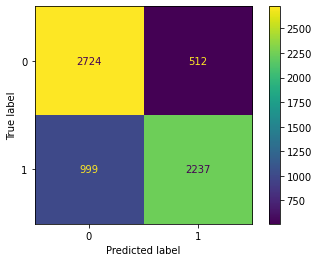

In [0]:
cm_lrs = confusion_matrix(y_build_bal, list(map(round,lrs.predict(X_build_sm))), labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_lrs, display_labels=None)
disp.plot()
#plt.show()

We can thus calculate the accuracy at about 77%:

In [0]:
cm = cm_lrs

acc_lrs = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

acc_lrs

Out[67]: 0.7665327564894932

The confusion matrix reveals that our ML algorithm seems to have done a satisfactory job of addressing one of the most important challenges in higher ed. If we slice it 

- vertically: we see that about 82% of students predicted to leave actually did 
- horizontally: 68% of students that actually left the university were predicted to leave.

**EXERCISE: How was the 82% calculated? Write it as a fraction. What is this metric called? How was the 68% calculated? Write it as a fraction. What is this metric called?**

While this seems promising for an essentially fresh out the box model, we have to remember that the approximately 77% accurate predictions were made on the *training set*, i.e. the data used to build the model. In our running human learning analogy, all we've done is **memorize** a set of facts and definitions, and regurgitate them nearly flawlessly on a multiple choice exam that consisted of the precisely the same material we studied.  Unfortunately that is not indicative of whether we would be able to write an essay on the material we studied, or apply concepts learned to a scenario not discussed in class. To do that we'd need to examine our acuracy on an unseen test set.

#VIDEO 5

###Model Validation and Selection - Hyperparameter tuning and model generalizability

A model's performance on the training set is an initial indication of how well parameter choices do at minimizing the objective function. This is an important characteristic we build in to the modeling process. However, if our ultimate aim is deployment to new data, then it is mandatory that model choice be informed by applying the prediction and scoring steps of the *Fit-Predict-Score* cycle to unseen data.

As discussed in *Explaining Machine Learning Cycle With Hyperparameter Tuning* in Module 4, *k-Fold Cross Validation* is a powerful process we can apply to our data and model to simulate performance on unseen data. Figure 3 gives a visual representation on our example training data. To perform 6-fold cross validation, we randomly partition the training data into six mutually exclusive samples of size 2. 

**Figure 3:** An example of 6-fold cross validation on a the training set of a dataframe with 15 observations.
![ih](files/ml-file-store/bronze/k_fold_pic.png)

These six mutually exclusive samples of size 2 refered to above will serve as test sets (referred to as *validation* sets in this context) for 6 independent batches of *Fit-Predict-Score* cycles. The corresponding training sets (referred to as *building* sets in this context) are the remaining 10 observations not selected for the validation set. For each batch, we fit the data with various combinations of features and keep track to identify the best subset. To execute this process we first import the *cross_val_score* method from the *model_selection* module in scikit learn.

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV

######Step 1: Identify Feature Search Space

List the set of features you'd like to include in feature selection.

######Step 2: Specify Number of Folds

To what extent should we divvy up our data up for validation? Consider two extremes:

\\(k=2\\)

Set one validation set that is half of the training set.
 - Pro: Computationally efficient. Validation is more challenging, so a better simulation of unseen data. 
 - Con: Only one Fit-Predict-Score cycle, minimal training experience.

\\(k=n\\)

Each observation becomes its own validation set, and we use the remaining data to fit the model. Also known as leave-one-out cross validation.
 - Pro: Maximizes number of Fit-Predict-Score cycles, providing a profile of each point
 - Con: Computationally expensive

As we've become accustomed to, the ideal is in the balance. Typically we use \\(k\\) between \\(5\\) and \\(10\\).

In [0]:
cv_folds = 5  # Selecting 5-fold cross-validation

######Step 3: *Fit-Predict-Score*

Implement the *Fit-Predict-Score* cycle to identify average score across the 5 folds for each point in the hyperparameter space. This provides the criterion we will use to select our estimate for \\(k\\) and fit our final model. The following figure and subsequent code illustrate and execute this process.

The **GridSearchCV** function in scikit learn will provide a powerful tool for a smooth implementation of the Fit-Predict-Score cycle in the framework of k-fold cross validation.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

features = X_build_p1.shape[1]
acc_values = [0]  # Starting value for no regressors

model = LogisticRegression(penalty ='none',random_state=rms,max_iter=1000)
cv_folds = 5  # Example: 5-fold cross-validation

classification_metric='accuracy'

# For each number of features, perform SFS and evaluate the model using k-fold cross-validation
for k in range(1, features):
    sfs = SequentialFeatureSelector(model, n_features_to_select=k)
    X_build_selected = sfs.fit_transform(X_build_p1, y_build_bal)

    # Use cross-validation to get mean R^2 score over all folds
    scores = cross_val_score(model, X_build_selected, y_build_bal, cv=cv_folds, scoring=classification_metric)
    mean_re = scores.mean()
    
    acc_values.append(mean_re)

# Now, acc_values contains the mean accuracy scores from cross-validation for each number of features

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

Let's use *graph_objects* from Plotly to visualize the increase in \\(Accuracy\\) as a function of the number of parameters in our model. We're looking to identify where the increase levels off.

In [0]:
import plotly.graph_objects as go

# Plot using plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(0, features + 1)), 
                         y=acc_values,
                         mode='lines+markers',
                         name='$Accuracy$ Score'))

fig.update_layout(title='Number of Regressors vs. $Acc$ Score using SFS',
                  xaxis_title='Number of Regressors (p-1)',
                  yaxis_title='$Acc$ Score',
                  xaxis=dict(tickvals=list(range(features + 1))),
                  showlegend=True,
                  width=800,   # Width of the figure in pixels
                  height=800)  # Height of the figure in pixels

fig.update_yaxes(range=[0, 1])

fig.show()

The appearance of this graph is a common occurence in ML, particularly for metrics (such as \\(Acc\\)) that will deterministically improve when you increase the number of predictor variables. There comes a point that the benefits of adding another variable to increase the \\(Acc\\) are dwarfed by the cost of overfitting. *The corner principle* states that this crucial point typically occurs at or near a corner in the graph, right before the plot levels off. Investigating the values, it seems that **the 6 regressor model** is where the \\(Acc\\) seems to stabilize at about 0.7685. Note this actually exceeds our metric above, even though less data is used due to cross validation. 

Let's identify the variables using the *SequentialFeatureSelector*, and fit to the entire training set to prepare to deploy. That will provide us our final fitted model. At that point we'll be able to determine how well our model performs on the heretofor untouched test set.

In [0]:
# For a given k, perform SFS
k = 6
sfs = SequentialFeatureSelector(model, n_features_to_select=k)
sfs.fit(X_build_p1, y_build_bal)

# Identify and print the selected features
selected_features = np.array(final_column_names)[np.where(sfs.get_support() == True)]
print(f"The top {k} features selected by SFS are:")
print(list(selected_features))

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

######Reduced Logistic Model

Now that the optimal number of features has been chosen via cross validation, we fit the entire training set with the *best_lrc* model, and use that to evaluate performance.

In [0]:
# Add a constant to get an intercept
X_build_sm1 = sm.add_constant(X_build_p1[selected_features])

# Fit the regression line using ‘OLS’
lrs1 = sm.GLM(y_build_bal, X_build_sm1,family=sm.families.Binomial()).fit()

print(lrs1.summary())

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

                 Generalized Linear Model Regression Results                  
Dep. Variable:           SEM_3_STATUS   No. Observations:                 6472
Model:                            GLM   Df Residuals:                     6465
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3225.0
Date:                Thu, 11 Jan 2024   Deviance:                       6450.0
Time:                        07:55:35   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
       

Thus our final multiple linear regression model is the reduced one: 
$$logit(\pi(\vec{x})) = 0.2214+0.6486\*\text{DFW.RATE.1}-0.3972\*\text{UNITS.ATTEMPTED.2}+1.0787\*\text{DFW.RATE.2}+0.4520\*\text{RACE.ETHNICITY.White}+0.4860\*\text{RACE.ETHNICITY.Nonresident.alien}-0.2224\*\text{FIRST.GEN.STATUS.First Generation}$$

Out[74]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f11b659dd90>

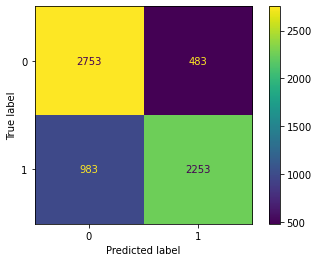

In [0]:
cm_lrs1 = confusion_matrix(y_build_bal, list(map(round,lrs1.predict(X_build_sm1))), labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_lrs1, display_labels=None)
disp.plot()

In [0]:
cm = cm_lrs1

acc_lrs1 = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

acc_lrs1

Out[75]: 0.7734857849196539

Note that this represents a slight improvement over the "out of the box" logistic classifier:

In [0]:
acc_lrs1-acc_lrs

Out[76]: 0.006953028430160768

**Validaiton**

In [0]:
# Add a constant to get an intercept
X_train_sm1 = sm.add_constant(X_train_p1[selected_features])
X_val_sm1 = sm.add_constant(X_val_p1[selected_features])
X_test_sm1 = sm.add_constant(X_test_p1[selected_features])
# Fit the regression line using ‘OLS’
lrs_train = sm.GLM(y_train_bal, X_train_sm1,family=sm.families.Binomial()).fit()

print(lrs_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           SEM_3_STATUS   No. Observations:                 7408
Model:                            GLM   Df Residuals:                     7401
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3673.4
Date:                Thu, 11 Jan 2024   Deviance:                       7346.9
Time:                        07:55:35   Pearson chi2:                 7.74e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

######Variable Importance

Recall that logistic regression from the machine learning perspective does not make the strong assumptions on the response variable that ordinary least squares does, and because of that, statistical inference concerning individual predictors is not available. That being said, this is not a complete black box; we can identify and rank the variables that played the biggest role in identifying the optimal model. *Variable importance* is usually visualized graphically as follows:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [0]:
#Select features based on whether PCA was used or not
#Original Variables
X = X_train_p1[selected_features]

#PCA
#X = pca_X_train[:,[0,1,2,3]]

y = y_train_bal

model = LogisticRegression(penalty ='none',random_state=rms,max_iter=1000)

# Calculate baseline accuracy
baseline_accuracy = cross_val_score(model, X, y, cv=5, scoring=classification_metric).mean()

# Calculate feature importance scores
importance_scores = []

for feature_index in range(X.shape[1]):
    X_subset = X.drop(X.columns[feature_index], axis=1)
    accuracy_after_removal = cross_val_score(model, X_subset, y, cv=5, scoring=classification_metric).mean()
    importance_scores.append(baseline_accuracy - accuracy_after_removal)

#Original Variables
importance_df = pd.DataFrame({'Feature': selected_features, 'Change in Accuracy': importance_scores})

#PCA: Create a DataFrame for Plotly Express
#importance_df = pd.DataFrame({'Feature': ['pc1', 'pc2', 'pc3', 'pc4'], 'Change in Accuracy': importance_scores})

importance_df_sorted = importance_df.sort_values('Change in Accuracy')

# Plot the importance scores using Plotly Express
fig = px.bar(importance_df_sorted, y='Feature', x='Change in Accuracy',
             labels={'Change in Accuracy': 'Change in Accuracy'},
             orientation='h',  # Set orientation to horizontal
             title='Feature Importance for Statsmodels Logistic Regression')

fig.show()


/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

In [0]:
# Extracting z-statistics and corresponding variable names
z_stats = np.abs(lrs1.tvalues)
variable_names = z_stats.index[1:6].tolist()

# Create a DataFrame for plotting
data = pd.DataFrame({'Variable': variable_names, 'Z-Statistic': z_stats.values[1:6]}).sort_values(by='Z-Statistic')

# Create a horizontal bar chart using plotly.express
fig = px.bar(data, x='Z-Statistic', y='Variable', orientation='h', title='Variable Importance Plot')

# Show the plot
fig.show()

#VIDEO 6

###Model Testing - Evaluating generalizability and looking ahead

A model is only useful to the extent that it can be deployed to make accurate predictions on unseen data from similar target populations. This is the reason for reserving a portion of our data as a test set, completely untouched by the building, validation or specification steps. We use accuracy as the primary metric to evaluate performance of our model, but due to the critical nature of identifying the positive class (students who leave campus), monitoring recall and sensitivity will be of utmost importance.   

In [0]:

predictions_lrs_test = lrs_train.predict(X_test_sm1)




Accuracy= 0.695274831243973  Specificity= 0.6876332622601279  Precision= 0.20596205962059622  Sensitivity/Recall= 0.7676767676767676


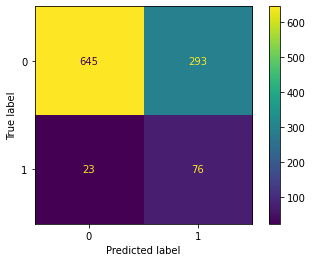

In [0]:
cm_lrs = confusion_matrix(y_test_c, list(map(round,lrs1.predict(X_test_sm1))), labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_lrs, display_labels=None)
disp.plot()
cm = cm_lrs

acc_lrs = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

specif_lrs = (cm[0,0])/(cm[0,0]+cm[0,1])

prec_lrs = (cm[1,1])/(cm[1,1]+cm[0,1])

sens_lrs = (cm[1,1])/(cm[1,1]+cm[1,0])

print("Accuracy=",acc_lrs," Specificity=",specif_lrs," Precision=",prec_lrs," Sensitivity/Recall=",sens_lrs)

In [0]:
probs = predictions_lrs_test
#threshold = y_train_c.sum()/len(y_train_c)
threshold = 0.50
yhat_th = (probs>=threshold).astype(int)

In [0]:
px.histogram(x=probs)

In [0]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc


In [0]:
fpr, tpr, thresholds = roc_curve(y_test_c, probs)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test_c, probs)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(recall, precision):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

We conclude the testing phase by updating our running comparison of model performance

In [0]:
Final_Metrics = pd.DataFrame({'Method':['Logistic'],'Accuracy':[acc_lrs],'Precision':[prec_lrs],'Recall':[sens_lrs],'PR AUC':[auc(recall, precision)]})
Final_Metrics


,Method,Accuracy,Precision,Recall,PR AUC
0,Logistic,0.695275,0.205962,0.767677,0.571415


These metrics may be utilized to evaluate the quality of the model in two primary ways

  1. As performance metrics we can compare with those from other models to make a final choice on which to deploy.

  Multiple logistic regression will be the yardstick we use to measure other models.
  
  2. By comparing test set metric values with those from the training set, close values indicate the ability of our model to generalize.

  Test metrics are only slightly worse than training metrics, indicating both models are useful for generalizing to unseen data.

#VIDEO 7

##Deploying the Data for Impact

###Predicting Outcomes for new Cases

With the trained, tested and validated model in hand, Shontelle is ready to utilize it to glean insights concerning a random sample of students who have shown various signs of struggling in their university experience. She then downloads a spreadsheet entitled **classif_data.csv**. Let's take a look at the data:

In [0]:
esam = pd.read_csv('/dbfs/FileStore/ml-file-store/bronze/classif_data')
esam

,Unnamed: 0,NAME,SID,ENROLLMENT_YEAR,ENROLLMENT_TERM,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_GPA,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,FIRST_SEM_W,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,DFW_UNITS_1,GPA_1,CUM_GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,DFW_UNITS_2,GPA_2,CUM_GPA_2
0,0,Jaime,000GPJ93V,2021,Fall,20214,Hispanic,Male,Continuing Generation,3.970239,3.205086,3.152426,Engineering,0,8,8,0,3.125,3.125,10,7,3,2.90,3.050
1,1,Bethany,000M7YLAX,2021,Fall,20214,White,Female,Continuing Generation,3.702649,3.119864,3.191927,Liberal Arts,0,12,9,3,2.250,2.250,12,12,0,2.25,2.250
2,2,Marisol,000NSOJN5,2021,Fall,20214,Hispanic,Female,First Generation,3.751494,3.044736,2.935482,Health,0,9,3,6,1.500,1.500,10,2,8,1.20,1.300
3,3,Kent,000O3VNKL,2021,Fall,20214,Asian,Male,First Generation,3.282063,3.466105,3.823987,Science,0,15,11,4,2.000,2.000,12,6,6,2.00,2.000
4,4,Tasha,000VJZY7Q,2021,Fall,20214,Black or African American,Female,First Generation,3.890517,3.794312,3.512793,Business,0,16,16,0,3.800,3.800,17,17,0,3.00,3.400
5,5,Peggy,000ABCDE1,2021,Fall,20214,Asian,Female,Continuing Generation,3.972042,3.093119,3.920177,Engineering,0,14,12,2,3.100,3.100,16,15,1,3.75,3.500
6,6,Fred,000ABCDE2,2021,Fall,20214,White,Male,First Generation,3.502444,3.431067,3.193452,Business,0,15,12,3,2.400,2.400,14,11,3,2.20,2.308
7,7,Alex,000ABCDE3,2021,Fall,20214,Asian,Male,Continuing Generation,3.938181,3.583889,3.971437,Health,0,14,3,11,1.000,1.000,15,6,9,2.08,1.840
8,8,Kelly,000ABCDE4,2021,Fall,20214,Black or African American,Female,Continuing Generation,3.525838,3.678231,3.168331,Science,0,13,12,1,3.000,3.000,13,11,2,2.70,2.890
9,9,Ana,000ABCDE5,2021,Fall,20214,White,Female,First Generation,3.639249,3.097655,3.906897,Liberal Arts,0,10,7,3,2.750,2.750,13,4,9,1.30,1.875


Shontelle is happy with the sample, as a quick glance indicates ethnic and academic diversity, a reflection of her university. She notices that the data indicates that Marisol, Alex and Ana are currently in academc warning due to their CUM_GPA_2 being less than 2.0:

In [0]:
esam['NAME'][esam['CUM_GPA_2']<2]

Out[90]: 2    Marisol
7       Alex
9        Ana
Name: NAME, dtype: object

As academic disqualification is not completely determined until the end of term 3, she aims to use our validated model to predict status at the beginning of semester 3.

Based on our approach above she realizes she has some feature engineering to do, and so she then calculates DFW rates and grade points for each term:

In [0]:
#Initialize the new dataframe
esam1 = esam.copy()


esam1['DFW_RATE_1'] = (esam1['UNITS_ATTEMPTED_1']-esam1['UNITS_COMPLETED_1'])/esam1['UNITS_ATTEMPTED_1']

#DFW Rate Term 2
esam1['DFW_RATE_2'] = (esam1['UNITS_ATTEMPTED_2']-esam1['UNITS_COMPLETED_2'])/esam1['UNITS_ATTEMPTED_2']

#Grade points Term 1
esam1['GRADE_POINTS_1'] = esam1['UNITS_ATTEMPTED_1']*esam1['GPA_1']

#Grade points Term 2
esam1['GRADE_POINTS_2'] = esam1['UNITS_ATTEMPTED_2']*esam1['GPA_2']

esam1

,Unnamed: 0,NAME,SID,ENROLLMENT_YEAR,ENROLLMENT_TERM,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_GPA,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,FIRST_SEM_W,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,DFW_UNITS_1,GPA_1,CUM_GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,DFW_UNITS_2,GPA_2,CUM_GPA_2,DFW_RATE_1,DFW_RATE_2,GRADE_POINTS_1,GRADE_POINTS_2
0,0,Jaime,000GPJ93V,2021,Fall,20214,Hispanic,Male,Continuing Generation,3.970239,3.205086,3.152426,Engineering,0,8,8,0,3.125,3.125,10,7,3,2.90,3.050,0.000000,0.300000,25.0,29.0
1,1,Bethany,000M7YLAX,2021,Fall,20214,White,Female,Continuing Generation,3.702649,3.119864,3.191927,Liberal Arts,0,12,9,3,2.250,2.250,12,12,0,2.25,2.250,0.250000,0.000000,27.0,27.0
2,2,Marisol,000NSOJN5,2021,Fall,20214,Hispanic,Female,First Generation,3.751494,3.044736,2.935482,Health,0,9,3,6,1.500,1.500,10,2,8,1.20,1.300,0.666667,0.800000,13.5,12.0
3,3,Kent,000O3VNKL,2021,Fall,20214,Asian,Male,First Generation,3.282063,3.466105,3.823987,Science,0,15,11,4,2.000,2.000,12,6,6,2.00,2.000,0.266667,0.500000,30.0,24.0
4,4,Tasha,000VJZY7Q,2021,Fall,20214,Black or African American,Female,First Generation,3.890517,3.794312,3.512793,Business,0,16,16,0,3.800,3.800,17,17,0,3.00,3.400,0.000000,0.000000,60.8,51.0
5,5,Peggy,000ABCDE1,2021,Fall,20214,Asian,Female,Continuing Generation,3.972042,3.093119,3.920177,Engineering,0,14,12,2,3.100,3.100,16,15,1,3.75,3.500,0.142857,0.062500,43.4,60.0
6,6,Fred,000ABCDE2,2021,Fall,20214,White,Male,First Generation,3.502444,3.431067,3.193452,Business,0,15,12,3,2.400,2.400,14,11,3,2.20,2.308,0.200000,0.214286,36.0,30.8
7,7,Alex,000ABCDE3,2021,Fall,20214,Asian,Male,Continuing Generation,3.938181,3.583889,3.971437,Health,0,14,3,11,1.000,1.000,15,6,9,2.08,1.840,0.785714,0.600000,14.0,31.2
8,8,Kelly,000ABCDE4,2021,Fall,20214,Black or African American,Female,Continuing Generation,3.525838,3.678231,3.168331,Science,0,13,12,1,3.000,3.000,13,11,2,2.70,2.890,0.076923,0.153846,39.0,35.1
9,9,Ana,000ABCDE5,2021,Fall,20214,White,Female,First Generation,3.639249,3.097655,3.906897,Liberal Arts,0,10,7,3,2.750,2.750,13,4,9,1.30,1.875,0.300000,0.692308,27.5,16.9


To prepare her dataframe for the pipelines used in this notebook, she removes variables not included in the modeling process, and verifies that they match our work above:

In [0]:
esam2 = esam1[selected_columns]
esam2

,HS_ENGL_GPA,HS_MATH_GPA,GPA_1,UNITS_ATTEMPTED_1,DFW_RATE_1,UNITS_ATTEMPTED_2,GPA_2,DFW_RATE_2,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS
0,3.152426,3.205086,3.125,8,0.000000,10,2.90,0.300000,Hispanic,Male,Continuing Generation
1,3.191927,3.119864,2.250,12,0.250000,12,2.25,0.000000,White,Female,Continuing Generation
2,2.935482,3.044736,1.500,9,0.666667,10,1.20,0.800000,Hispanic,Female,First Generation
3,3.823987,3.466105,2.000,15,0.266667,12,2.00,0.500000,Asian,Male,First Generation
4,3.512793,3.794312,3.800,16,0.000000,17,3.00,0.000000,Black or African American,Female,First Generation
5,3.920177,3.093119,3.100,14,0.142857,16,3.75,0.062500,Asian,Female,Continuing Generation
6,3.193452,3.431067,2.400,15,0.200000,14,2.20,0.214286,White,Male,First Generation
7,3.971437,3.583889,1.000,14,0.785714,15,2.08,0.600000,Asian,Male,Continuing Generation
8,3.168331,3.678231,3.000,13,0.076923,13,2.70,0.153846,Black or African American,Female,Continuing Generation
9,3.906897,3.097655,2.750,10,0.300000,13,1.30,0.692308,White,Female,First Generation


Next she runs her risk data through the feature engineering pipeline for qualitative and quantitative variables. Finally she uses our final, "best" model validated and selected above to predict probability of departure for each student, and uses a 0.5 threshold to classify 0's and 1's.

In [0]:
#
esam3 = pd.DataFrame(preprocessor.fit_transform(esam2),columns=all_column_names)
esam4 = esam3[selected_features]
esam_sm = sm.add_constant(esam4)

esam1['Pred_SEM_3_STATUS_prob'] = lrs1.predict(esam_sm)
esam1['Pred_SEM_3_STATUS'] = list(map(round,lrs1.predict(esam_sm)))
esam1.sort_values(by='Pred_SEM_3_STATUS_prob')

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,Unnamed: 0,NAME,SID,ENROLLMENT_YEAR,ENROLLMENT_TERM,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_GPA,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,FIRST_SEM_W,UNITS_ATTEMPTED_1,UNITS_COMPLETED_1,DFW_UNITS_1,GPA_1,CUM_GPA_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_2,DFW_UNITS_2,GPA_2,CUM_GPA_2,DFW_RATE_1,DFW_RATE_2,GRADE_POINTS_1,GRADE_POINTS_2,Pred_SEM_3_STATUS_prob,Pred_SEM_3_STATUS
5,5,Peggy,000ABCDE1,2021,Fall,20214,Asian,Female,Continuing Generation,3.972042,3.093119,3.920177,Engineering,0,14,12,2,3.100,3.100,16,15,1,3.75,3.500,0.142857,0.062500,43.4,60.0,0.091473,0
4,4,Tasha,000VJZY7Q,2021,Fall,20214,Black or African American,Female,First Generation,3.890517,3.794312,3.512793,Business,0,16,16,0,3.800,3.800,17,17,0,3.00,3.400,0.000000,0.000000,60.8,51.0,0.127277,0
1,1,Bethany,000M7YLAX,2021,Fall,20214,White,Female,Continuing Generation,3.702649,3.119864,3.191927,Liberal Arts,0,12,9,3,2.250,2.250,12,12,0,2.25,2.250,0.250000,0.000000,27.0,27.0,0.291826,0
8,8,Kelly,000ABCDE4,2021,Fall,20214,Black or African American,Female,Continuing Generation,3.525838,3.678231,3.168331,Science,0,13,12,1,3.000,3.000,13,11,2,2.70,2.890,0.076923,0.153846,39.0,35.1,0.451064,0
6,6,Fred,000ABCDE2,2021,Fall,20214,White,Male,First Generation,3.502444,3.431067,3.193452,Business,0,15,12,3,2.400,2.400,14,11,3,2.20,2.308,0.200000,0.214286,36.0,30.8,0.452450,0
0,0,Jaime,000GPJ93V,2021,Fall,20214,Hispanic,Male,Continuing Generation,3.970239,3.205086,3.152426,Engineering,0,8,8,0,3.125,3.125,10,7,3,2.90,3.050,0.000000,0.300000,25.0,29.0,0.667733,1
7,7,Alex,000ABCDE3,2021,Fall,20214,Asian,Male,Continuing Generation,3.938181,3.583889,3.971437,Health,0,14,3,11,1.000,1.000,15,6,9,2.08,1.840,0.785714,0.600000,14.0,31.2,0.696773,1
3,3,Kent,000O3VNKL,2021,Fall,20214,Asian,Male,First Generation,3.282063,3.466105,3.823987,Science,0,15,11,4,2.000,2.000,12,6,6,2.00,2.000,0.266667,0.500000,30.0,24.0,0.733894,1
9,9,Ana,000ABCDE5,2021,Fall,20214,White,Female,First Generation,3.639249,3.097655,3.906897,Liberal Arts,0,10,7,3,2.750,2.750,13,4,9,1.30,1.875,0.300000,0.692308,27.5,16.9,0.918486,1
2,2,Marisol,000NSOJN5,2021,Fall,20214,Hispanic,Female,First Generation,3.751494,3.044736,2.935482,Health,0,9,3,6,1.500,1.500,10,2,8,1.20,1.300,0.666667,0.800000,13.5,12.0,0.961784,1


###Addressing the Higher Ed Challenge

The model predicts Marisol, Alex, Ana and Kent to be in danger of leaving the university before the start of the next semester. Given that our test precision is about 22%, she understands that not all students predicted to be 1 will actually depart; and not all students predicted to stay will. So she utilizes the predictions as a starting point, synthesizes it with her findings from the focus group and literature, and identifies Kent and Marisol as at particular risk for dropping out. She arranges time to meet with them to ensure that they have the academic and socio-emotional support they need. 

#HOMEWORK